In [1]:
# load training result get from preprocess.py module

import json
with open('ad2Adv.json', 'r') as fp:
    ad2AdvStr = json.load(fp)

with open('ad2Cam.json', 'r') as fp:
    ad2CamStr = json.load(fp)

with open('finalDis2Doc.json', 'r') as fp:
    finalDis2DocStr = json.load(fp)
    
with open('finalDoc2Cate.json', 'r') as fp:
    finalDoc2CateStr = json.load(fp) 

with open('finalDoc2Topic.json', 'r') as fp:
    finalDoc2TopicStr = json.load(fp)  
    
with open('finalDoc2Meta.json', 'r') as fp:
    finalDoc2MetaStr = json.load(fp)  
    
with open('finalData.json', 'r') as fp:
    finalDataStr = json.load(fp) 

In [12]:
# convert str dict to value dict
ad2Adv = dict()
for each in ad2AdvStr:
    ad2Adv[float(each)] = float(ad2AdvStr[each])

ad2Cam = dict()
for each in ad2CamStr:
    ad2Cam[float(each)] = float(ad2CamStr[each])
    
finalDis2Doc = dict()
for each in finalDis2DocStr:
    finalDis2Doc[float(each)] = float(finalDis2DocStr[each])
    
finalDoc2Cate = dict()
for each in finalDoc2CateStr:
    finalDoc2Cate[float(each)] = float(finalDoc2CateStr[each])
    
finalDoc2Topic = dict()
for each in finalDoc2TopicStr:
    finalDoc2Topic[float(each)] = float(finalDoc2TopicStr[each])
    
finalDoc2Meta = dict()
for each in finalDoc2MetaStr:
    finalDoc2Meta[float(each)] = float(finalDoc2MetaStr[each])
    
finalData = dict()
for each in finalDataStr:
    finalData[float(each)] = eval(finalDataStr[each])

In [13]:
print finalData

{131076.0: [(1978, 0), (8306, 0), (98326, 0), (135312, 0), (145148, 0), (166608, 0), (191055, 0), (301337, 0), (326399, 1)], 188423.0: [(710, 0), (2731, 0), (32731, 0), (36188, 0), (36309, 1), (152908, 0), (153244, 0), (335529, 0)], 180232.0: [(160155, 1), (171043, 0), (179797, 0), (241013, 0)], 155658.0: [(43677, 0), (111928, 0), (231159, 0), (274119, 1)], 172045.0: [(29922, 0), (57081, 0), (127089, 0), (154074, 0), (204686, 0), (204758, 0), (220295, 0), (227140, 1)], 180239.0: [(143064, 0), (153191, 0), (167294, 1), (224947, 0), (232139, 0), (333173, 0)], 147472.0: [(61159, 0), (153171, 0), (190062, 0), (235104, 0), (269779, 1), (295976, 0)], 17.0: [(27309, 0), (37191, 1), (81652, 0), (250080, 0)], 155671.0: [(116154, 0), (146836, 0), (172704, 0), (265616, 1)], 180248.0: [(50302, 0), (177159, 0), (180808, 0), (182205, 1), (234445, 0), (270195, 0)], 4.0: [(149930, 0), (153623, 1), (184709, 0), (186849, 0), (233730, 0)], 36008.0: [(239602, 0), (263486, 1)], 128346.0: [(126962, 1), (153

In [3]:
# prepare set x and y
import numpy as np
x = np.array
xTrainSet = []
yTrainSet = []
xTestSet = []
yTestSet = []
# this is only use for test
xTrainClickSet = []
yTrainClickSet = []
xTestClickSet = []
yTestClickSet = []
xTestNotClickSet = []
yTestNotClickSet = []

# 1 click and 1 not click count
clickCount = 0
nonClickCount = 0

countSplit = 0
splitThreshold = 2702
for disID in finalData:
    xSubSet = []
    ySubSet = []
    adClickIDTupleSet = finalData[disID]
    for adClickIDTuple in adClickIDTupleSet:
        adID = adClickIDTuple[0]
        clickID = adClickIDTuple[1]
        # from ad_id
        advID = ad2Adv[adID]
        camID = ad2Cam[adID]
        # docID key
        docID = finalDis2Doc[disID]
        # from display_id
        cateID = finalDoc2Cate[docID]
        topicID = finalDoc2Topic[docID]
        metaID = finalDoc2Meta[docID]
        # make subset for x
        xSubSet = [advID, camID, cateID, topicID, metaID]
        # make subset for y
        if (clickID == 0): # not click
            ySubSet = [1, 0]
        else:
            ySubSet = [0, 1] # click
        # train and test dict
        if (countSplit < splitThreshold):
            xTrainSet.append(xSubSet)
            yTrainSet.append(ySubSet) 
            if (ySubSet == [0, 1]) and clickCount == 0: # click
                xTrainClickSet.append(xSubSet)
                yTrainClickSet.append(ySubSet)
                clickCount += 1
            if (ySubSet == [1, 0]) and nonClickCount == 0: # not click
                xTrainClickSet.append(xSubSet)
                yTrainClickSet.append(ySubSet)
                nonClickCount += 1
        else:
            xTestSet.append(xSubSet)
            yTestSet.append(ySubSet) 
            if (ySubSet == [0, 1]): # click
                xTestClickSet.append(xSubSet)
                yTestClickSet.append(ySubSet)
            else:
                xTestNotClickSet.append(xSubSet)
                yTestNotClickSet.append(ySubSet)
    countSplit += 1
    clickCount = 0
    nonClickCount = 0

In [5]:
print ((xTrainSet))
# print (len(xTrainClickSet))
# print (len(xTestSet))
# print (len(xTestClickSet)+len(xTestNotClickSet))

[[94.0, 343.0, 1902.0, 184.0, 57.0], [693.0, 613.0, 1902.0, 184.0, 57.0], [2198.0, 12615.0, 1902.0, 184.0, 57.0], [693.0, 613.0, 1902.0, 184.0, 57.0], [2198.0, 18546.0, 1902.0, 184.0, 57.0], [343.0, 9084.0, 1902.0, 184.0, 57.0], [94.0, 18486.0, 1902.0, 184.0, 57.0], [1053.0, 28427.0, 1902.0, 184.0, 57.0], [2709.0, 29139.0, 1902.0, 184.0, 57.0], [174.0, 107.0, 1403.0, 16.0, 93.0], [243.0, 144.0, 1403.0, 16.0, 93.0], [1934.0, 4847.0, 1403.0, 16.0, 93.0], [1876.0, 4143.0, 1403.0, 16.0, 93.0], [1486.0, 2831.0, 1403.0, 16.0, 93.0], [1032.0, 19420.0, 1403.0, 16.0, 93.0], [3075.0, 19471.0, 1403.0, 16.0, 93.0], [112.0, 25886.0, 1403.0, 16.0, 93.0], [3321.0, 19823.0, 1403.0, 281.0, 93.0], [2777.0, 20993.0, 1403.0, 281.0, 93.0], [1531.0, 6051.0, 1403.0, 281.0, 93.0], [3484.0, 25808.0, 1403.0, 281.0, 93.0], [83.0, 6117.0, 1706.0, 214.0, 105.0], [210.0, 7299.0, 1706.0, 214.0, 105.0], [2151.0, 25325.0, 1706.0, 214.0, 105.0], [1135.0, 26263.0, 1706.0, 214.0, 105.0], [742.0, 1104.0, 1607.0, 97.0, 105

In [4]:
# train
# convert set x and y to matrix x and y
xTrain = np.array(xTrainSet, np.int32)
yTrain = np.array(yTrainSet, np.int32)
# convert set x and y to matrix x and y
xTrainClick = np.array(xTrainClickSet, np.int32)
yTrainClick = np.array(yTrainClickSet, np.int32)

# test
# convert set x and y to matrix x and y
xTest = np.array(xTestSet, np.int32)
yTest = np.array(yTestSet, np.int32)
# convert set x and y to matrix x and y
xTestClick = np.array(xTestClickSet, np.int32)
yTestClick = np.array(yTestClickSet, np.int32)
# convert set x and y to matrix x and y
xTestNotClick = np.array(xTestNotClickSet, np.int32)
yTestNotClick = np.array(yTestNotClickSet, np.int32)

In [5]:
# make dict for each display_id to matrix for passing to tensorflow for training
xTestDict = dict()
yTestDict = dict()
start = 0
count = 0
for i in range(len(xTest)-1):
    if xTest[i,2] != xTest[i+1,2]:
        xSubMatrix = xTest[start:i+1]
        ySubMatrix = yTest[start:i+1]
        xTestDict[count] = xSubMatrix
        yTestDict[count] = ySubMatrix
        count += 1
        start = i+1
        
xTrainDict = dict()
yTrainDict = dict()
start = 0
count = 0
for i in range(len(xTrain)-1):
    if xTrain[i,2] != xTrain[i+1,2]:
        xSubMatrix = xTrain[start:i+1]
        ySubMatrix = yTrain[start:i+1]
        xTrainDict[count] = xSubMatrix
        yTrainDict[count] = ySubMatrix
        count += 1
        start = i+1

In [254]:
print (len(xTrainDict))
print (len(yTrainDict))
print (len(xTestDict))
print (len(yTestDict))
print xTrain

2556
2556
534
534
[[   94   343  1902   184    57]
 [  693   613  1902   184    57]
 [ 2198 12615  1902   184    57]
 ..., 
 [ 1386  5007  1403   136    93]
 [ 1376 25086  1403   136    93]
 [ 1701 17295  1403   136    93]]


In [6]:
# PCA for data visulization
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# xTrainTranspose = xTrain.transpose()
# pca.fit(xTrainTranspose)
xTrainPCA = pca.fit_transform(xTrain)
#PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
#  svd_solver='auto', tol=0.0, whiten=False)
#xTrainPCA = pca.components_#.transpose()
# print(xTrainPCA)
print pca.explained_variance_ratio_

[  9.88605721e-01   1.05437800e-02   6.46889690e-04]


In [222]:
# # PCA for data visulization
# import numpy as np
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# xTrainTranspose = xTrain.transpose()
# pca.fit(xTrainTranspose)
# PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
#   svd_solver='auto', tol=0.0, whiten=False)
# xTrainPCA = pca.components_.transpose()
# print(xTrainPCA)

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

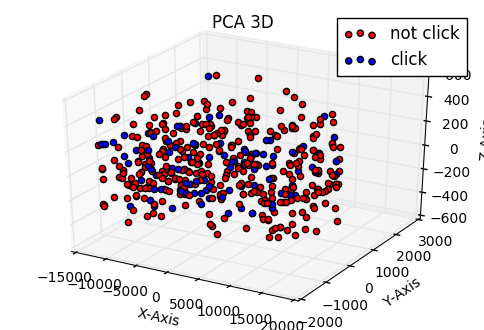

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x = xTrainPCA[:,0]
y = xTrainPCA[:,1]
z = xTrainPCA[:,2]
labelCountClick = 0
labelCountnotClick = 0
for i in range(len(x)):
    if i%30 == 0:
        if yTrain[i][1] == 1 and labelCountnotClick == 0:
            ax.scatter(x[i],y[i],z[i],c='b',marker='o', label='click') # not click
            labelCountnotClick += 1
        elif labelCountClick == 0:
            ax.scatter(x[i],y[i],z[i],c='r',marker='o', label='not click') # click
            labelCountClick += 1
        else:
            if yTrain[i][1] == 1:
                ax.scatter(x[i],y[i],z[i],c='b',marker='o') # not click
            else:
                ax.scatter(x[i],y[i],z[i],c='r',marker='o') # click
            
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
ax.set_title('PCA 3D')
plt.legend(loc='upper right')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
# ax.set_zlim3d(-0.02, 0.03)                    
# ax.set_ylim3d(-0.02, 0.03)                    
# ax.set_xlim3d(-0.02, 0.03)     
plt.show()

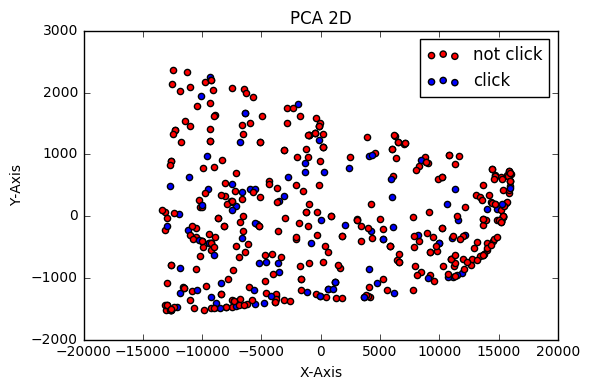

In [10]:
# 2d
pca = PCA(n_components=2)
# xTrainTranspose = xTrain.transpose()
# pca.fit(xTrainTranspose)
xTrainPCA = pca.fit_transform(xTrain)
#PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
#  svd_solver='auto', tol=0.0, whiten=False)
#xTrainPCA = pca.components_#.transpose()
# print(xTrainPCA)


import numpy as np
import matplotlib.pyplot as plt


x = xTrainPCA[:,0]
y = xTrainPCA[:,1]
labelCountClick = 0
labelCountnotClick = 0
for i in range(len(x)):
    if i%30 == 0:
        if yTrain[i][1] == 1 and labelCountnotClick == 0:
            plt.scatter(x[i],y[i],c='b',marker='o', label='click') # not click
            labelCountnotClick += 1
        elif labelCountClick == 0:
            plt.scatter(x[i],y[i],c='r',marker='o', label='not click') # click
            labelCountClick += 1
        else:
            if yTrain[i][1] == 1:
                plt.scatter(x[i],y[i],c='b',marker='o') # not click
            else:
                plt.scatter(x[i],y[i],c='r',marker='o') # click
            
# plt.set_xlabel('Y-Axis')
# plt.set_ylabel('Z-Axis')
# plt.set_title('PCA')
plt.legend(loc='upper right')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
# ax.set_zlim3d(-0.02, 0.03)                    
# ax.set_ylim3d(-0.02, 0.03)                    
# ax.set_xlim3d(-0.02, 0.03)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('PCA 2D')
plt.show()

In [154]:
from sklearn.neural_network import MLPClassifier

In [181]:
# NN Trial 1

import random
# Network Parameters
clf = MLPClassifier(solver='adam', activation='tanh', \
	learning_rate='adaptive', random_state=1, batch_size=200)

# training
clf.fit(xTrain, yTrain)

# testing 
corretCount = 0
totalCount = 0
for i in range(len(xTestDict)):
    maxSet = []
    pred = 0
    maxPred = -float('inf')
    yPred = clf.predict_proba(xTestDict[i])
    yTruth = yTestDict[i]
    maxSet = []
    for j in range(len(yPred)):
        pred = yPred[j][1]
        if pred > maxPred:
            maxSet = []
            maxSet.append(j)
            maxPred = pred
        elif pred == maxPred:
            maxSet.append(j)
    if (len(maxSet) == 1):
        maxIndex = 0
    else: 
        maxIndex = random.choice(maxSet)
    # prediction count
    if (yTruth[maxIndex][1]) == 1:
        corretCount += 1
    totalCount += 1
# print out final result
print float(corretCount)/float(totalCount)

0.25468164794


In [202]:
# NN Trial 1

import random
# Network Parameters
clf = MLPClassifier(hidden_layer_sizes=(100,1), solver='lbfgs', 
                    activation='tanh', learning_rate='adaptive', 
                    random_state=1, batch_size=200)

# training
clf.fit(xTrain, yTrain)

# testing 
corretCount = 0
totalCount = 0
for i in range(len(xTestDict)):
    maxSet = []
    pred = 0
    maxPred = -float('inf')
    yPred = clf.predict_proba(xTestDict[i])
    yTruth = yTestDict[i]
    maxSet = []
    for j in range(len(yPred)):
        pred = yPred[j][1]
        if pred > maxPred:
            maxSet = []
            maxSet.append(j)
            maxPred = pred
        elif pred == maxPred:
            maxSet.append(j)
    if (len(maxSet) == 1):
        maxIndex = 0
    else: 
        maxIndex = random.choice(maxSet)
    # prediction count
    if (yTruth[maxIndex][1]) == 1:
        corretCount += 1
    totalCount += 1
# print out final result
print float(corretCount)/float(totalCount)

0.2265917603
